In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [56]:
# Import first excel file
df_1 = pd.read_excel("/home/pasindu/AI-Development-for-Biomass-Heaters/dataset/July/22.06.2024-25.06.2024.xlsx", sheet_name="Group-2", skiprows=7)
df_1 = df_1.drop(0, axis=0)

In [57]:
df_1.head()

,Date Time,T.F. Heater Serpentine Coil Inlet Temperature No.1,T.F. Heater Serpentine Coil Inlet Temperature No.2,T.F. Heater Serpentine Coil Outlet Temperature,T.F. Heater Outlet Temperature - 1,T.F. Heater Outlet Temperature - 2 (Modulation),T.F. Heater Outlet Temperature - 3 (Safety),T.F. Expansion Tank Temperature - From Client
1,2024-06-22 00:00:00,226.699997,221.5,230.100006,243,242.299988,241.300003,52.099998
2,2024-06-22 00:02:00,225.5,220.899994,230.600006,243.599991,242.699997,242,52.299999
3,2024-06-22 00:04:00,225.300003,220.5,229.300003,242.899994,242.299988,241.100006,52.299999
4,2024-06-22 00:06:00,225.600006,220.600006,230.199997,243.399994,242.299988,241.600006,52.400002
5,2024-06-22 00:08:00,225.899994,220.800003,231,244.800003,243.599991,243.5,52.099998


In [58]:
# Import second excel file
df_2 = pd.read_excel("/home/pasindu/AI-Development-for-Biomass-Heaters/dataset/July/26.06.2024-03.07.2024.xlsx", sheet_name="Group-2", skiprows=7)
df_2 = df_2.drop(0, axis=0)


In [59]:
df_2.head()

,Date Time,T.F. Heater Serpentine Coil Inlet Temperature No.1,T.F. Heater Serpentine Coil Inlet Temperature No.2,T.F. Heater Serpentine Coil Outlet Temperature,T.F. Heater Outlet Temperature - 1,T.F. Heater Outlet Temperature - 2 (Modulation),T.F. Heater Outlet Temperature - 3 (Safety),T.F. Expansion Tank Temperature - From Client
1,2024-06-26 00:00:00,0,210.600006,222.300003,235.199997,234.199997,233.399994,46.5
2,2024-06-26 00:02:00,0,210.899994,222.899994,236,234.899994,234.5,46.400002
3,2024-06-26 00:04:00,0,210.899994,222.5,236.099991,235.199997,234.5,46.5
4,2024-06-26 00:06:00,0,212,223.699997,236.300003,235.399994,234.699997,46.5
5,2024-06-26 00:08:00,0,212.5,224.800003,237.199997,236.099991,235.600006,46.5


In [60]:
# Convert Date Time to datetime for df_1
df_1["Date Time"] = pd.to_datetime(df_1["Date Time"])


In [61]:
# Convert Date Time to datetime for df_2
df_2["Date Time"] = pd.to_datetime(df_2["Date Time"])


In [62]:
# Convert temperature columns to numeric for df_1
df_1['T.F. Heater Serpentine Coil Inlet Temperature No.1'] = pd.to_numeric(df_1['T.F. Heater Serpentine Coil Inlet Temperature No.1'], errors='coerce')
df_1['T.F. Heater Serpentine Coil Inlet Temperature No.2'] = pd.to_numeric(df_1['T.F. Heater Serpentine Coil Inlet Temperature No.2'], errors='coerce')


In [63]:
# Calculate average temperature for df_1
df_1['T.F. Heater Serpentine Coil Inlet Temperature'] =df_1['T.F. Heater Serpentine Coil Inlet Temperature No.2']


In [64]:
# Keep only Date Time and average temperature column for df_1
df_1 = df_1[['Date Time', 'T.F. Heater Serpentine Coil Inlet Temperature']]


In [65]:
# Convert temperature columns to numeric for df_2
df_2['T.F. Heater Serpentine Coil Inlet Temperature No.1'] = pd.to_numeric(df_2['T.F. Heater Serpentine Coil Inlet Temperature No.1'], errors='coerce')
df_2['T.F. Heater Serpentine Coil Inlet Temperature No.2'] = pd.to_numeric(df_2['T.F. Heater Serpentine Coil Inlet Temperature No.2'], errors='coerce')


In [66]:
# Calculate average temperature for df_2
df_2['T.F. Heater Serpentine Coil Inlet Temperature'] = df_2['T.F. Heater Serpentine Coil Inlet Temperature No.2']


In [67]:
# Keep only Date Time and average temperature column for df_2
df_2 = df_2[['Date Time', 'T.F. Heater Serpentine Coil Inlet Temperature']]


In [68]:
# Check the date ranges
print(f"df_1 start: {df_1['Date Time'].min()}")
print(f"df_1 end: {df_1['Date Time'].max()}")
print(f"df_2 start: {df_2['Date Time'].min()}")
print(f"df_2 end: {df_2['Date Time'].max()}")


df_1 start: 2024-06-22 00:00:00
df_1 end: 2024-06-25 16:52:00
df_2 start: 2024-06-26 00:00:00
df_2 end: 2024-07-03 15:32:00


In [69]:
# Extract data from 2024-06-24 to use for filling the gap
df_24 = df_1[(df_1['Date Time'] >= pd.to_datetime('2024-06-24 00:00:00')) & 
             (df_1['Date Time'] < pd.to_datetime('2024-06-25 00:00:00'))].copy()
print(f"Number of data points from 2024-06-24: {len(df_24)}")


Number of data points from 2024-06-24: 720


In [70]:
# Calculate the time difference between consecutive measurements (assuming 2-minute intervals)
time_diff = df_1['Date Time'].diff().mode()[0]  # Most common time difference
print(f"Time interval between measurements: {time_diff}")


Time interval between measurements: 0 days 00:02:00


In [71]:
# Create time range for the missing period (from df_1 end to df_2 start)
gap_start = df_1['Date Time'].max() + time_diff
gap_end = df_2['Date Time'].min()

# Generate time stamps for the gap period
gap_times = pd.date_range(start=gap_start, end=gap_end, freq=time_diff)
print(f"Gap period: {gap_start} to {gap_end}")
print(f"Number of missing data points: {len(gap_times)}")


Gap period: 2024-06-25 16:54:00 to 2024-06-26 00:00:00
Number of missing data points: 214


In [72]:
# Create a mapping from time-of-day to temperature values from 2024-06-24
df_24['time_of_day'] = df_24['Date Time'].dt.time
time_temp_map = dict(zip(df_24['time_of_day'], df_24['T.F. Heater Serpentine Coil Inlet Temperature']))

# Fill the gap using the same time-of-day values from 2024-06-24
gap_data = []
for gap_time in gap_times:
    time_key = gap_time.time()
    # Find the closest time match from 2024-06-24
    if time_key in time_temp_map:
        temp_value = time_temp_map[time_key]
    else:
        # If exact match not found, use the mean temperature from 2024-06-24
        temp_value = df_24['T.F. Heater Serpentine Coil Inlet Temperature'].mean()
    gap_data.append({'Date Time': gap_time, 'T.F. Heater Serpentine Coil Inlet Temperature': temp_value})

df_gap = pd.DataFrame(gap_data)
print(f"Created gap dataframe with {len(df_gap)} rows")


Created gap dataframe with 214 rows


In [73]:
# Merge df_1, gap data, and df_2
df_merged = pd.concat([df_1, df_gap, df_2], ignore_index=True)

# Sort by Date Time to ensure chronological order
df_merged = df_merged.sort_values('Date Time').reset_index(drop=True)

print(f"Total merged data points: {len(df_merged)}")
print(f"Merged data range: {df_merged['Date Time'].min()} to {df_merged['Date Time'].max()}")


Total merged data points: 8387
Merged data range: 2024-06-22 00:00:00 to 2024-07-03 15:32:00


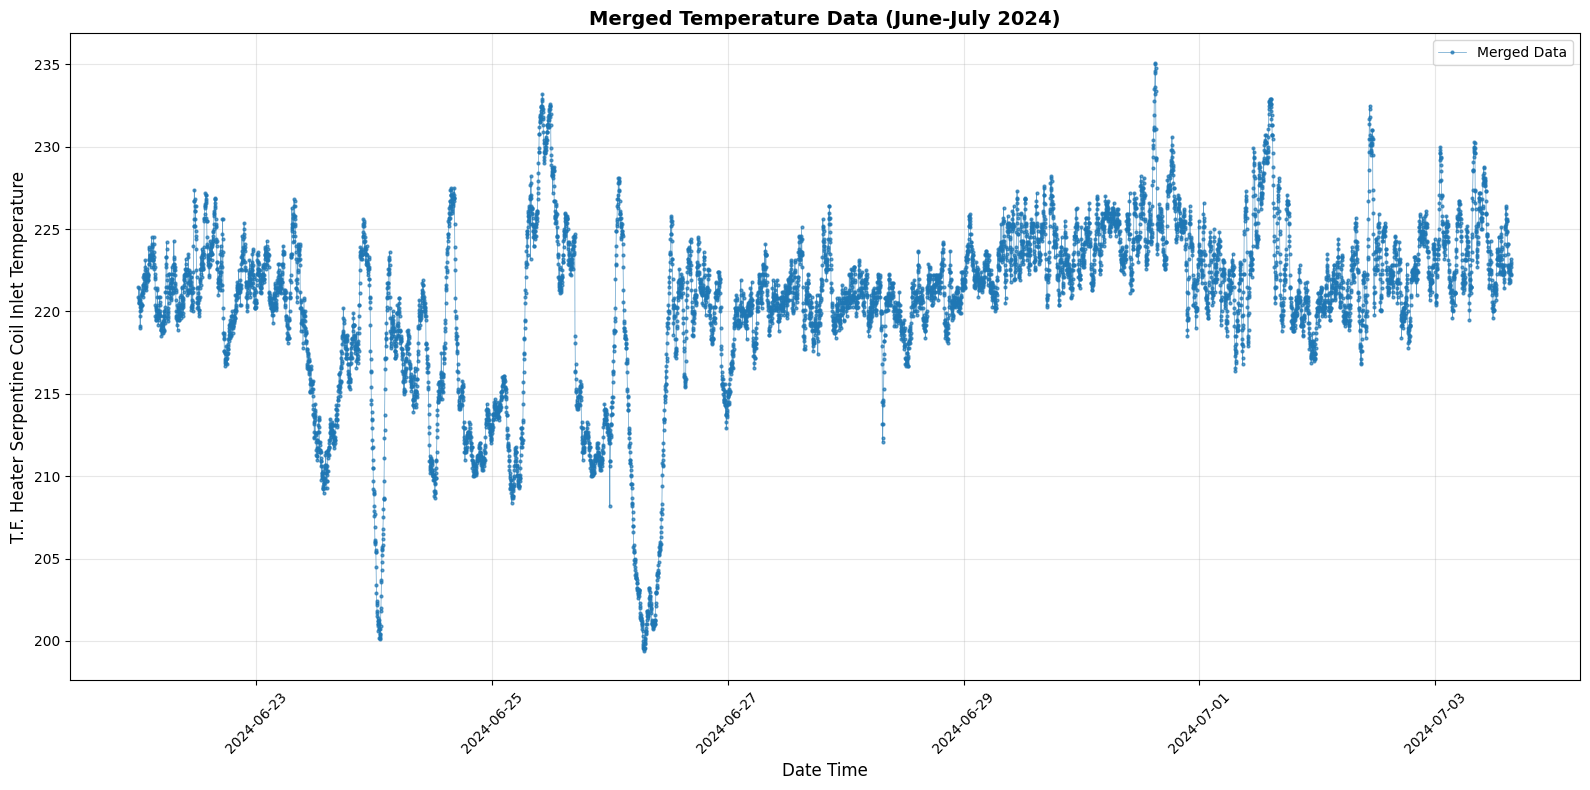

In [74]:
# Plot all data points
plt.figure(figsize=(16, 8))
plt.plot(df_merged['Date Time'], df_merged['T.F. Heater Serpentine Coil Inlet Temperature'], 
         marker='o', markersize=2, linewidth=0.5, alpha=0.7, label='Merged Data')
plt.xlabel('Date Time', fontsize=12)
plt.ylabel('T.F. Heater Serpentine Coil Inlet Temperature', fontsize=12)
plt.title('Merged Temperature Data (June-July 2024)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
# Save the merged dataframe as CSV
output_path = '/home/pasindu/AI-Development-for-Biomass-Heaters/data_cleaning/jun_july_merged.csv'
df_merged.to_csv(output_path, index=False)
print(f"Data saved successfully to: {output_path}")
print(f"DataFrame shape: {df_merged.shape}")


Data saved successfully to: /home/pasindu/AI-Development-for-Biomass-Heaters/data_cleaning/jun_july_merged.csv
DataFrame shape: (8387, 2)


In [76]:
# Display summary of merged dataframe
print("=" * 60)
print("MERGED DATASET SUMMARY")
print("=" * 60)
print(f"\nTotal number of data points: {len(df_merged)}")
print(f"\nDate range:")
print(f"  Start: {df_merged['Date Time'].min()}")
print(f"  End: {df_merged['Date Time'].max()}")
print(f"\nTemperature statistics:")
print(df_merged['T.F. Heater Serpentine Coil Inlet Temperature'].describe())
print(f"\nFirst few rows:")
print(df_merged.head(10))
print(f"\nLast few rows:")
print(df_merged.tail(10))


MERGED DATASET SUMMARY

Total number of data points: 8387

Date range:
  Start: 2024-06-22 00:00:00
  End: 2024-07-03 15:32:00

Temperature statistics:
count    8387.000000
mean      220.500000
std         5.247734
min       199.399994
25%       219.000000
50%       221.399994
75%       223.500000
max       235.100006
Name: T.F. Heater Serpentine Coil Inlet Temperature, dtype: float64

First few rows:
            Date Time  T.F. Heater Serpentine Coil Inlet Temperature
0 2024-06-22 00:00:00                                     221.500000
1 2024-06-22 00:02:00                                     220.899994
2 2024-06-22 00:04:00                                     220.500000
3 2024-06-22 00:06:00                                     220.600006
4 2024-06-22 00:08:00                                     220.800003
5 2024-06-22 00:10:00                                     221.399994
6 2024-06-22 00:12:00                                     220.500000
7 2024-06-22 00:14:00                      

In [77]:
df_1.columns

Index(['Date Time', 'T.F. Heater Serpentine Coil Inlet Temperature'], dtype='object')

In [78]:
df_1["Date Time"] = pd.to_datetime(df_1["Date Time"])
df_2["Date Time"] = pd.to_datetime(df_2["Date Time"])

In [79]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 1 to 2667
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date Time                                      2667 non-null   datetime64[ns]
 1   T.F. Heater Serpentine Coil Inlet Temperature  2667 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.8 KB
